In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import scipy as sp
import math
# import runpy

from sklearn.manifold import MDS

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

In [3]:
from scipy.ndimage import gaussian_filter1d

Ts = 1000
win = 20 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
# b=[2,3,9,15,14,13,7,1];
# label_ori={'Up','Up right', 'Right', 'Down right',...
#     'Down', 'Down left', 'Left', 'Up left'};

peak_all = []
for data_num in range(np.shape(data_cat)[0]):

    valcat_t = val_cat[data_num]
    datacat_t = data_cat[data_num]

    peak = []
    for a in range(8):

        # Peak
        vv = np.mean(valcat_t[a], axis = 0)
        I = np.where(max(vv) == vv)[0][0]
        s_temp = gaussian_filter1d(np.sum(datacat_t[a], axis = 0), win)
        I2 = np.where(max(s_temp) == s_temp)[0][0]
        peak.append(I2 - I)

    peak_all.append(peak)

onset_delay = np.array(peak_all) / Ts

In [4]:
df(onset_delay)

,0,1,2,3,4,5,6,7
0,0.030,0.030,0.006,0.002,-0.010,0.006,0.022,0.042
1,0.016,0.025,-0.018,-0.018,-0.018,-0.015,0.003,0.021
2,-0.048,-0.025,-0.026,-0.023,-0.008,-0.014,-0.019,-0.025
3,-0.028,-0.007,-0.029,-0.046,-0.026,-0.013,-0.019,-0.034
4,0.202,0.149,-0.017,-0.315,0.078,0.191,-0.004,-0.004
...,...,...,...,...,...,...,...,...
62,-0.278,-0.035,-0.037,-0.029,-0.011,-0.017,-0.001,-0.091
63,-0.316,-0.317,-0.011,-0.023,-0.010,-0.007,-0.317,-0.029
64,-0.019,-0.021,-0.006,0.010,0.023,0.038,0.016,-0.007
65,-0.011,-0.008,-0.022,-0.028,-0.030,-0.014,-0.010,-0.008


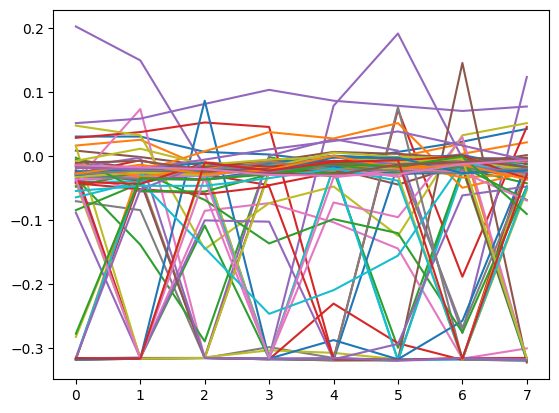

In [5]:
for a in range(len(onset_delay)):
    plt.figure
    plt.plot(onset_delay[a])


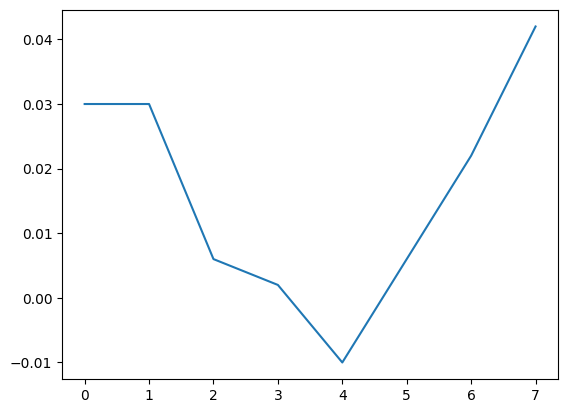

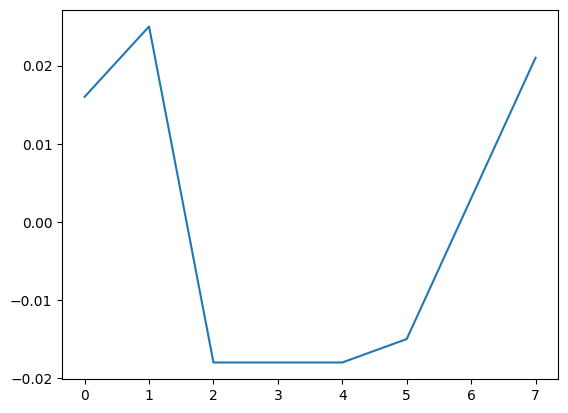

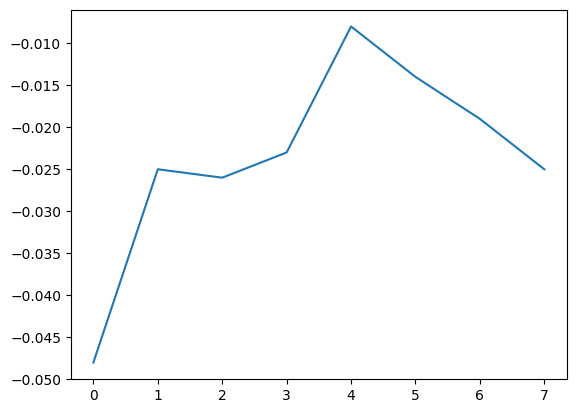

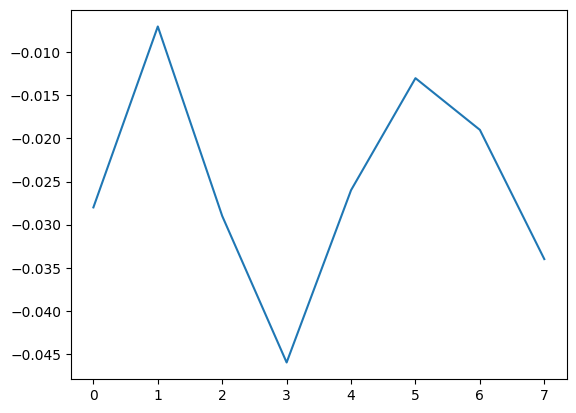

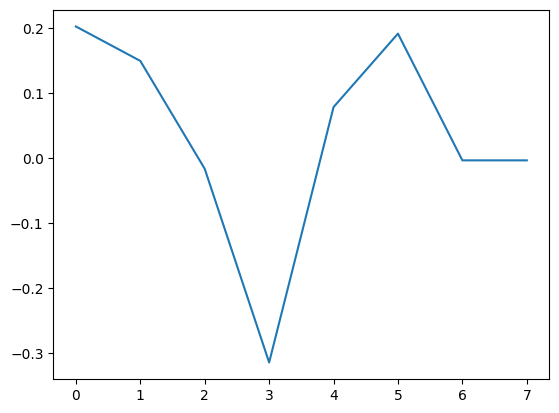

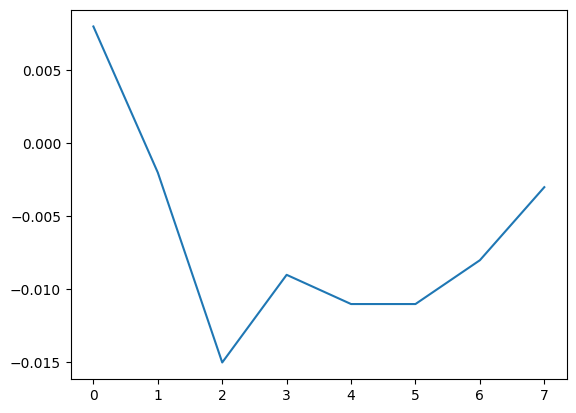

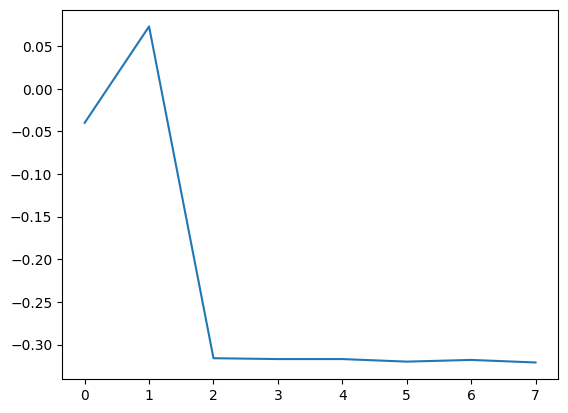

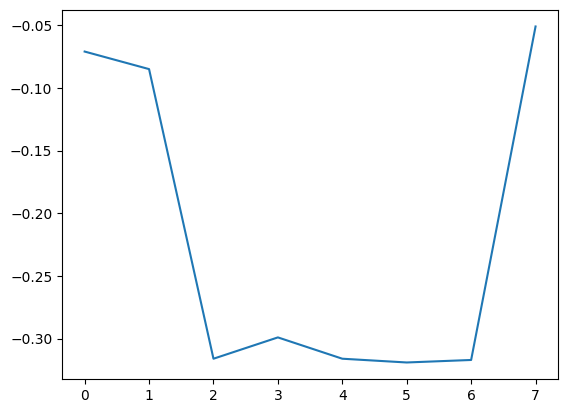

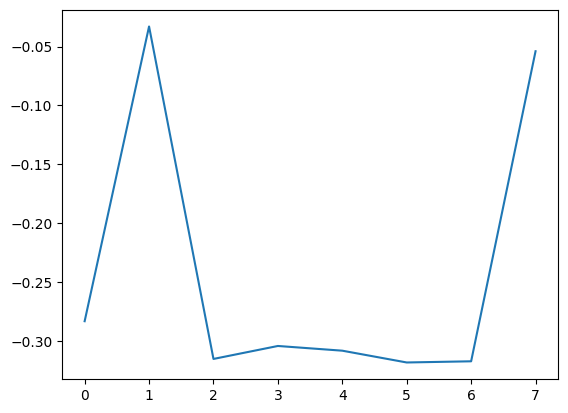

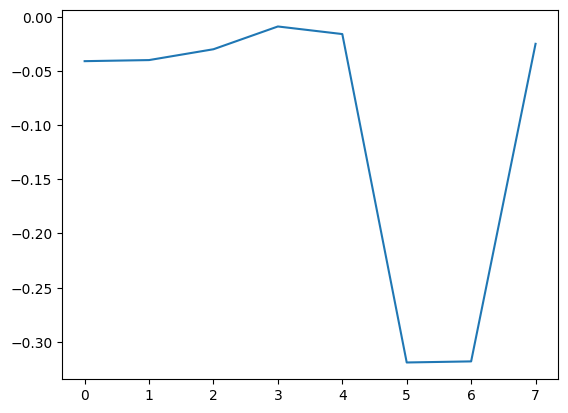

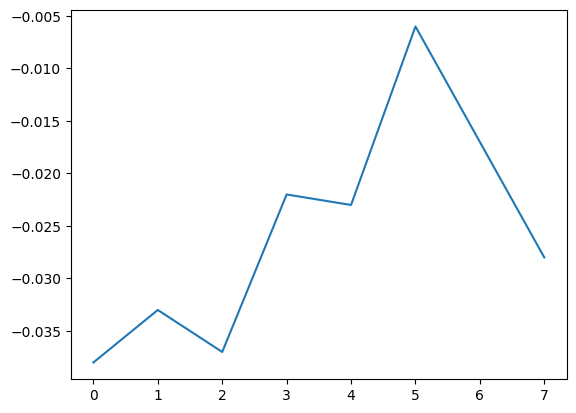

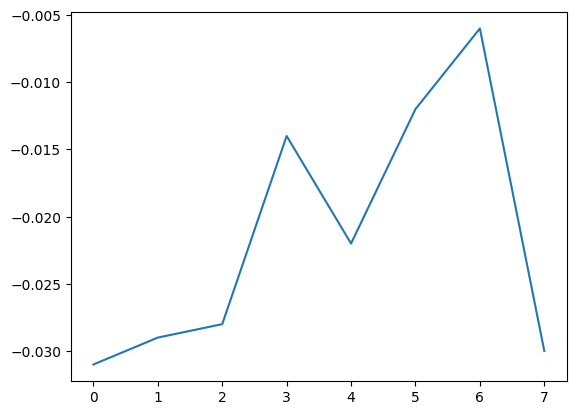

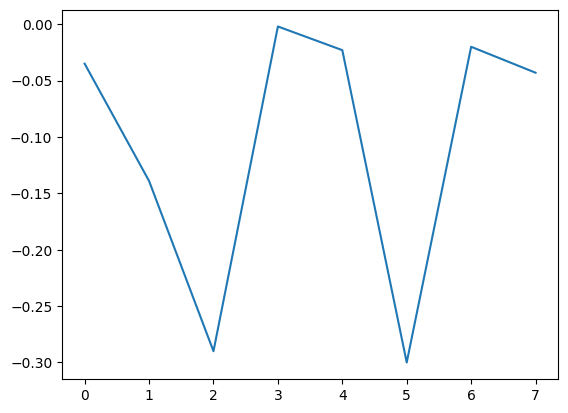

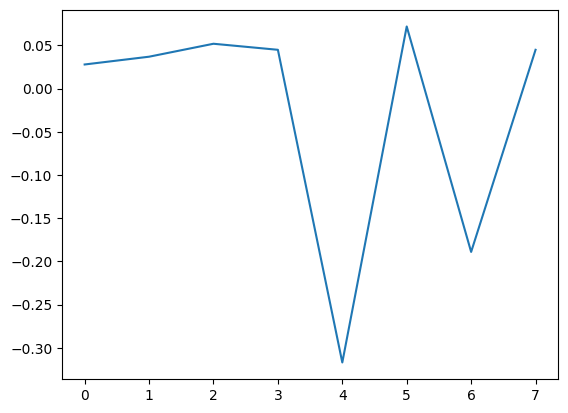

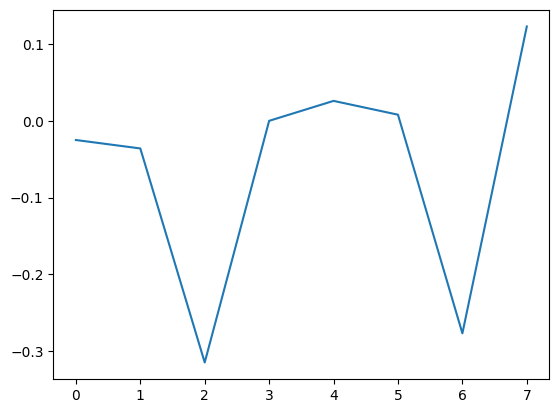

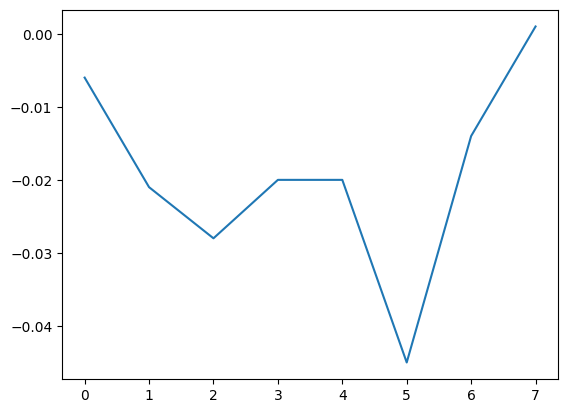

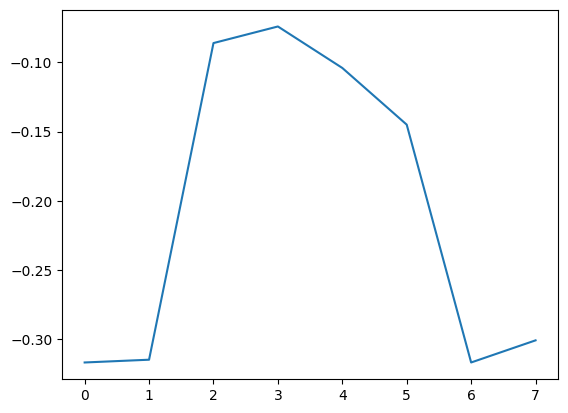

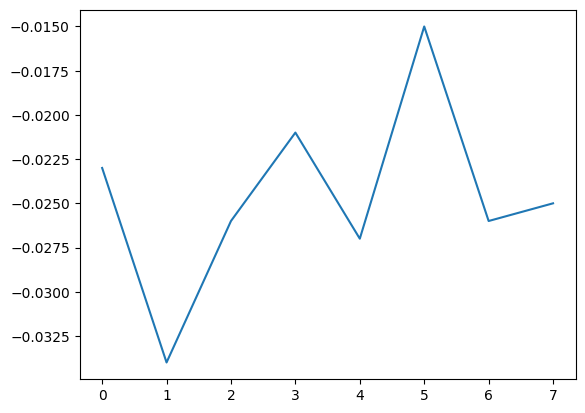

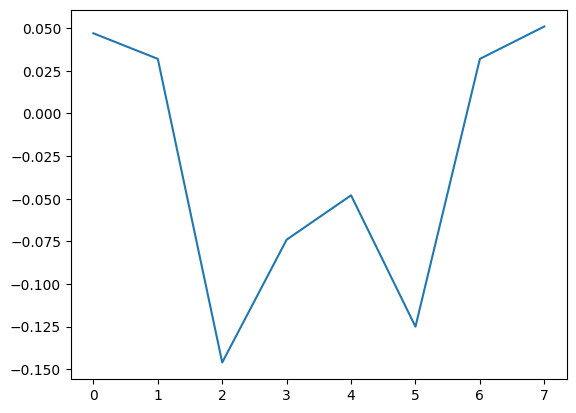

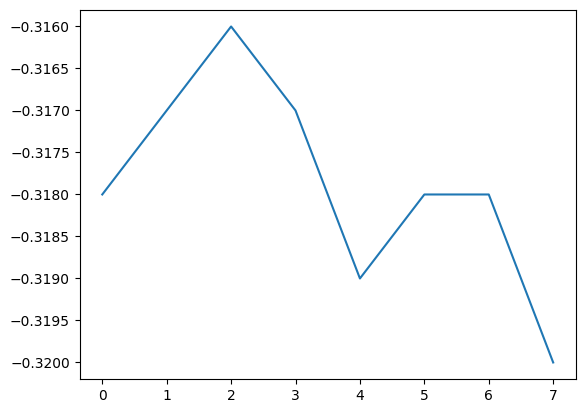

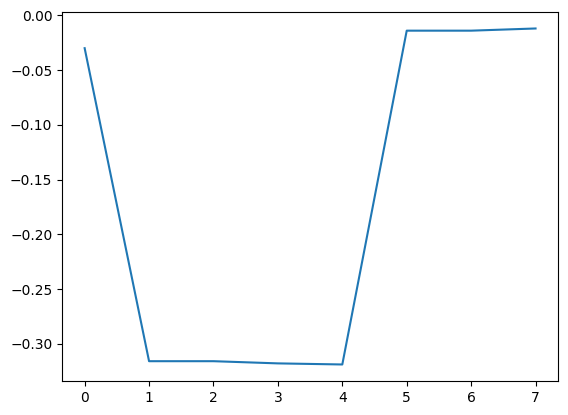

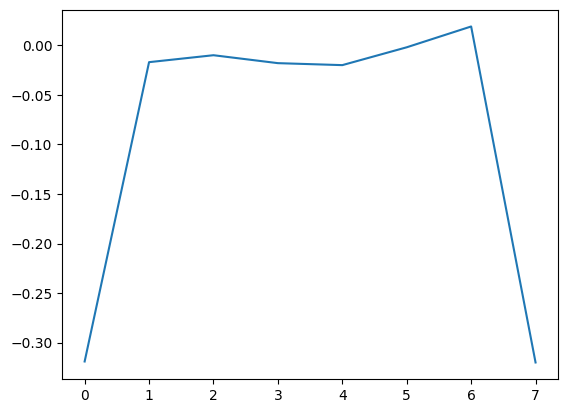

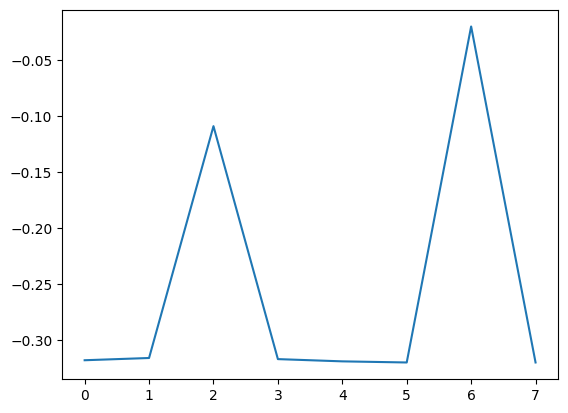

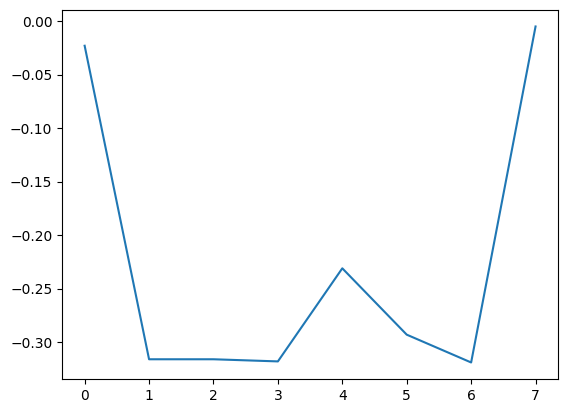

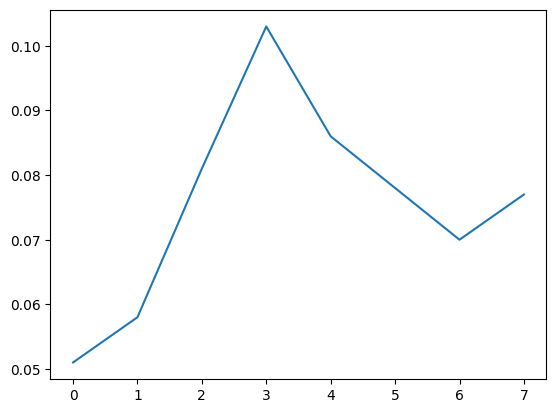

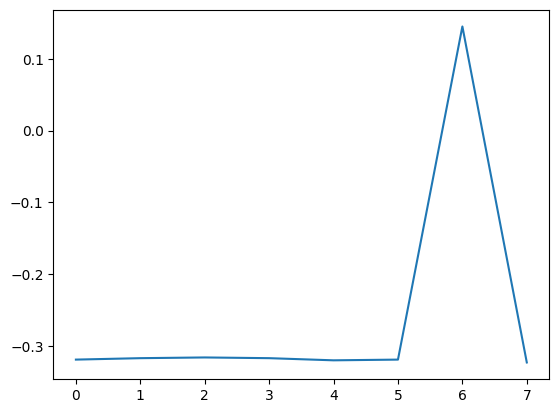

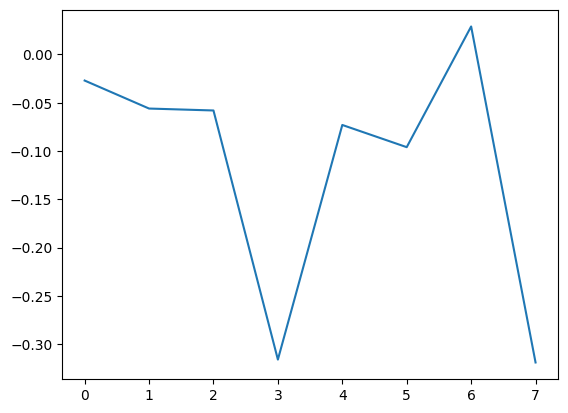

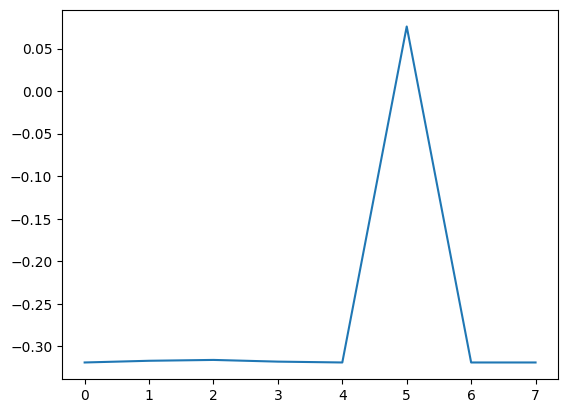

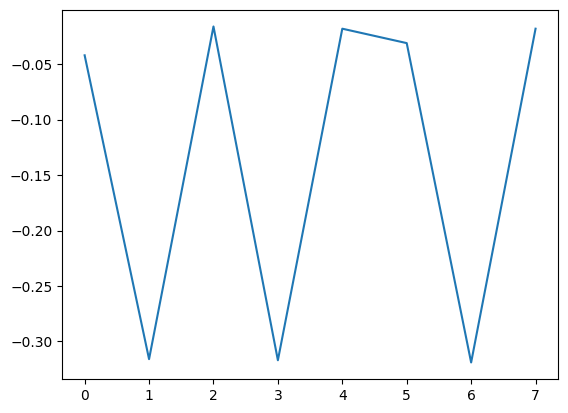

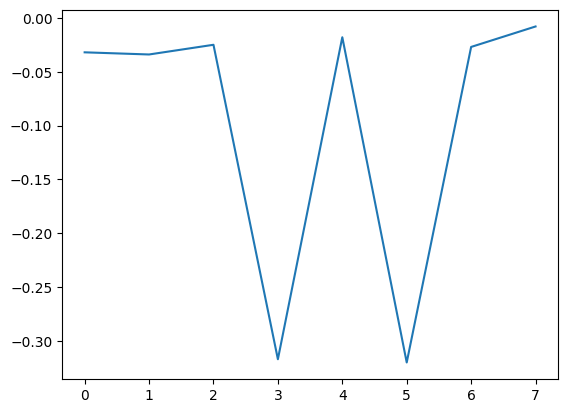

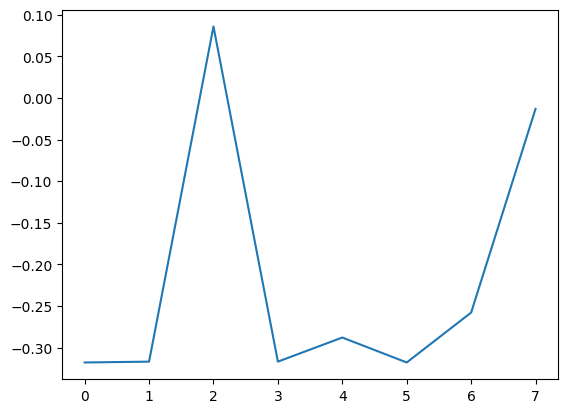

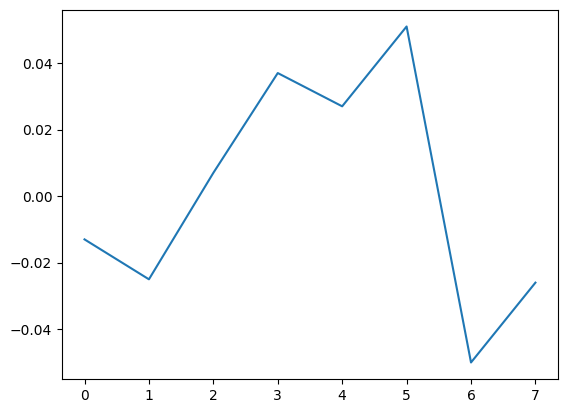

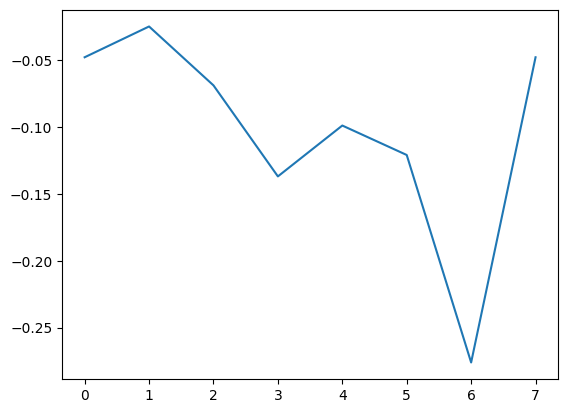

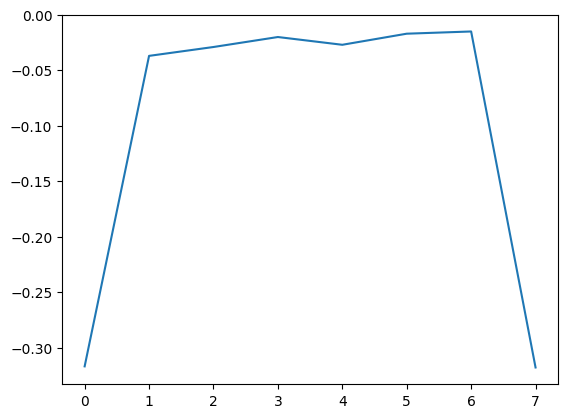

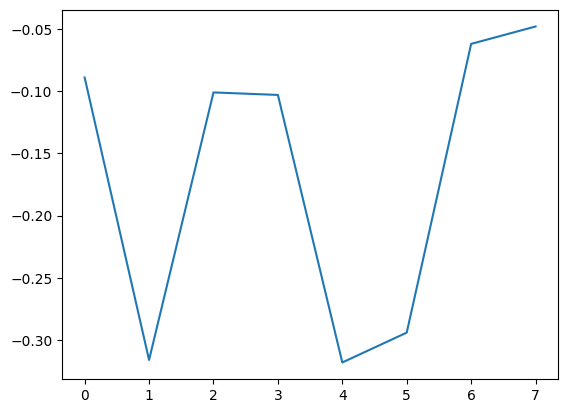

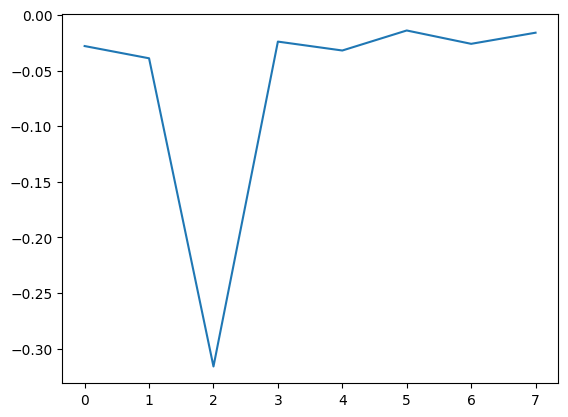

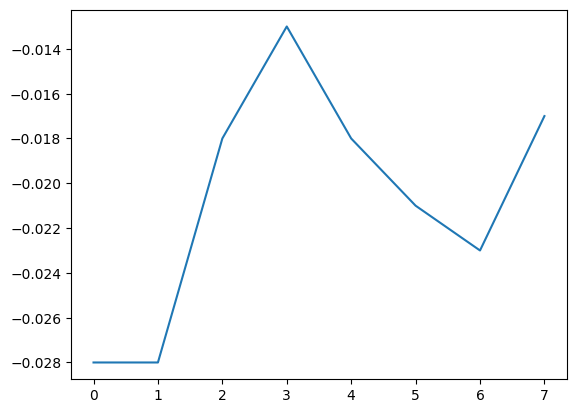

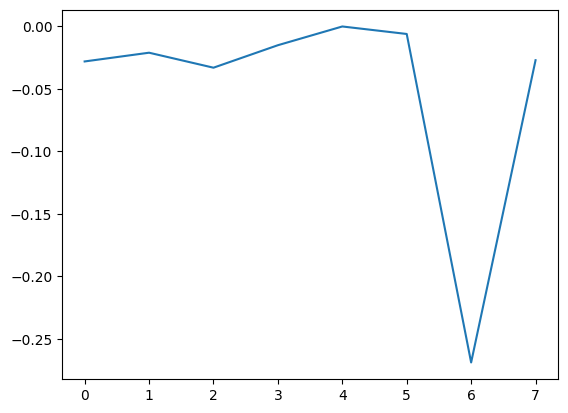

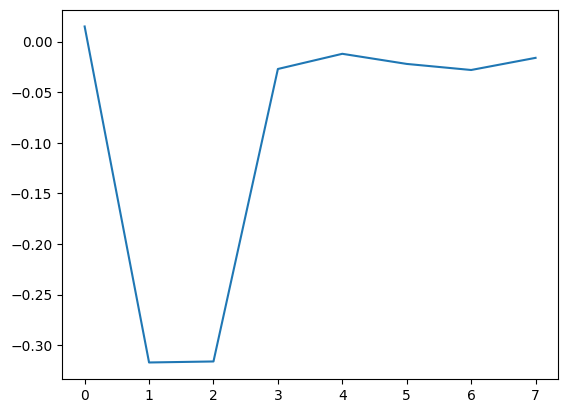

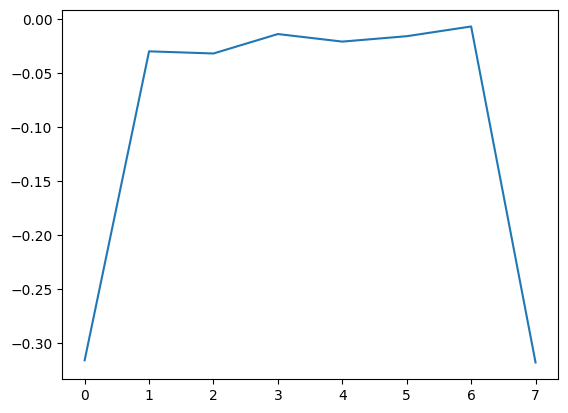

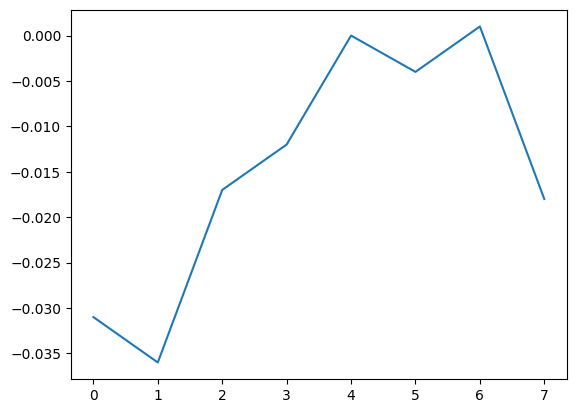

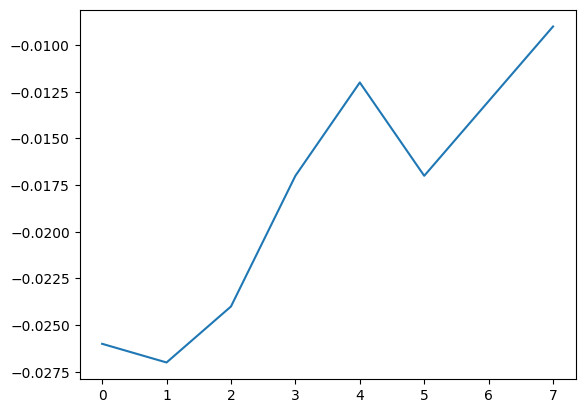

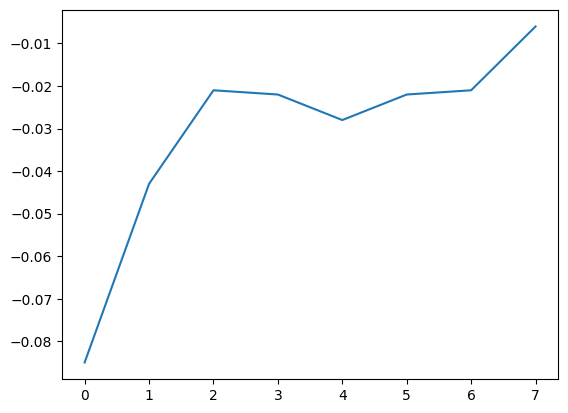

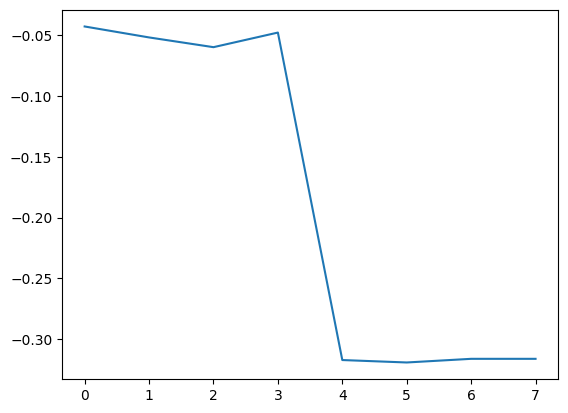

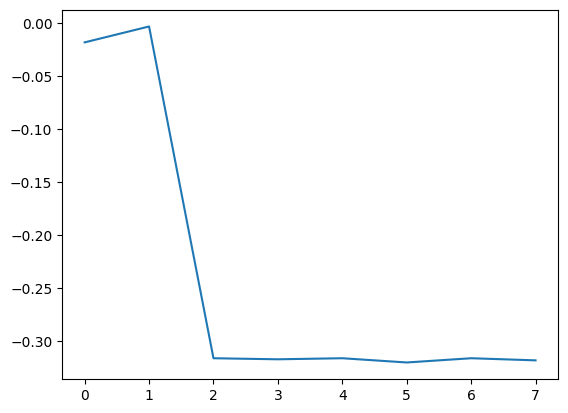

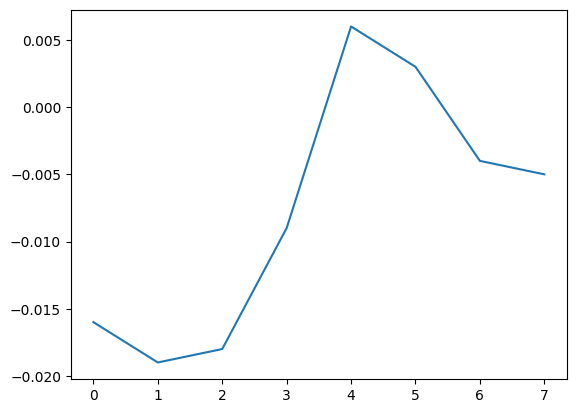

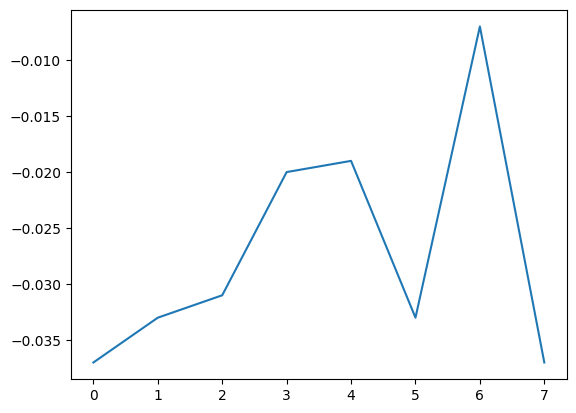

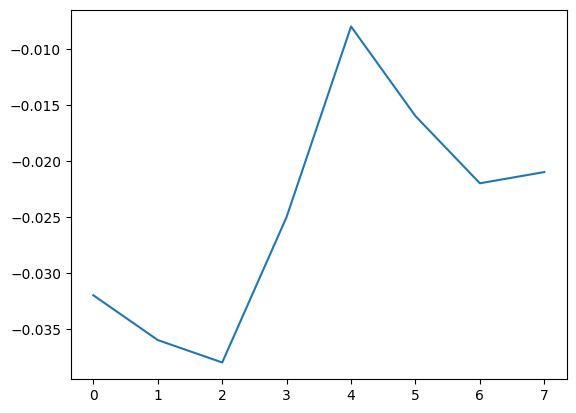

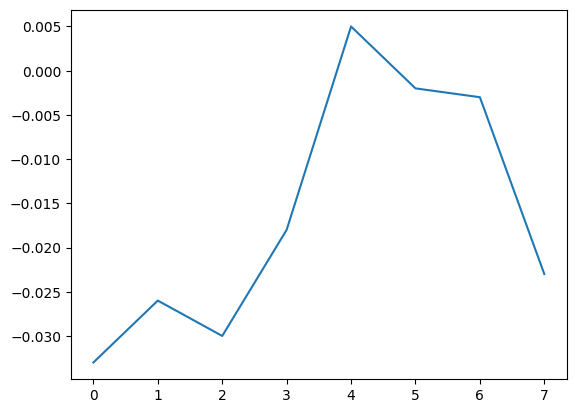

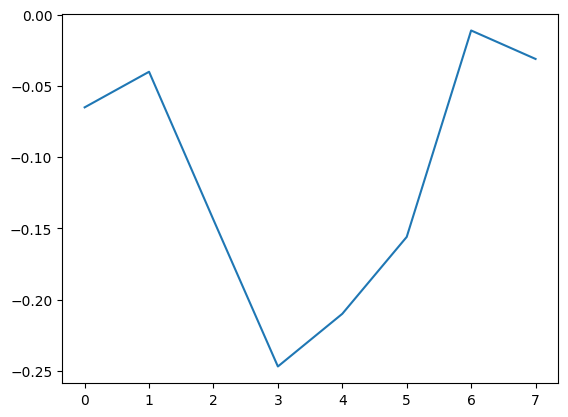

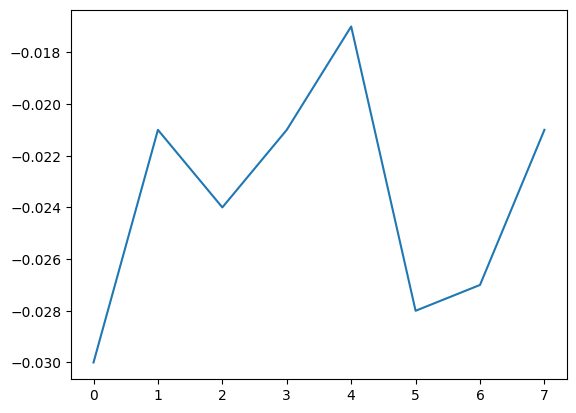

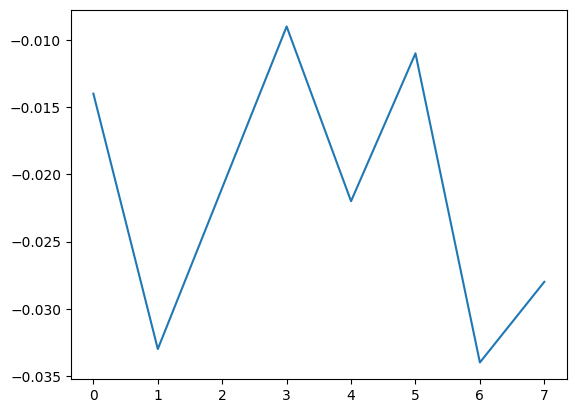

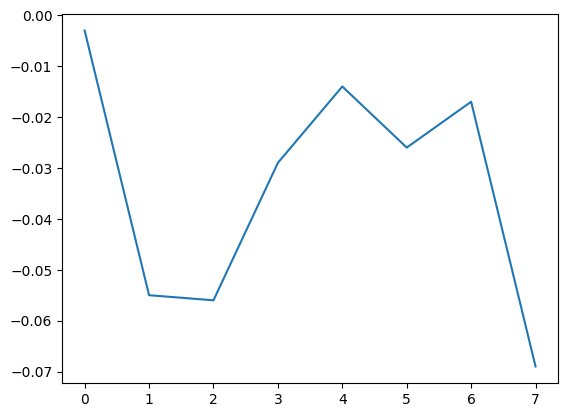

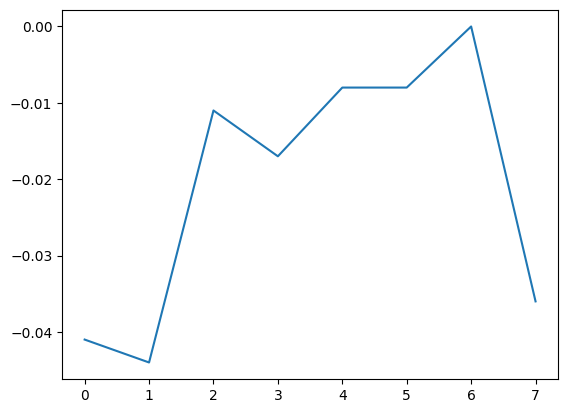

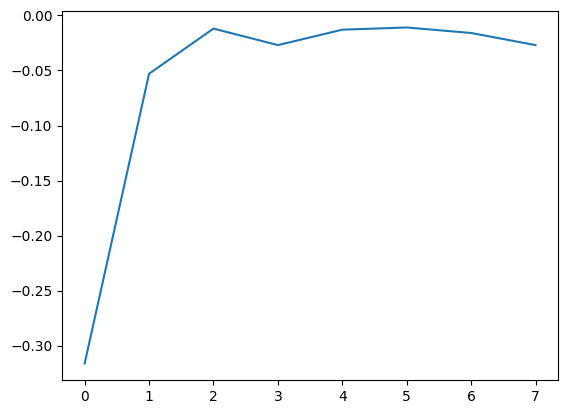

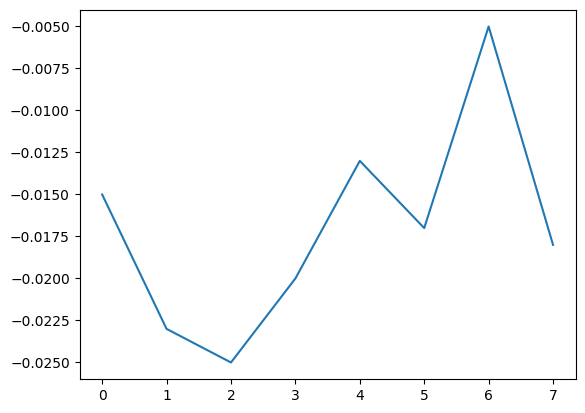

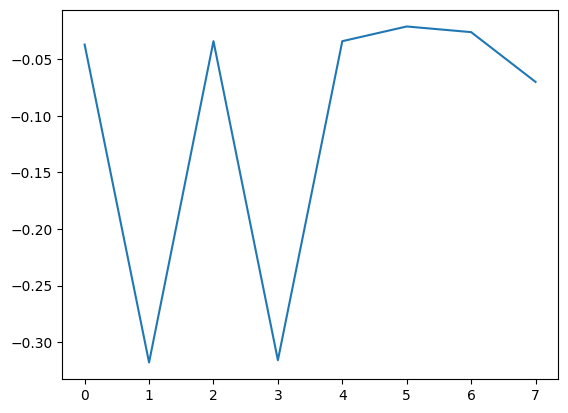

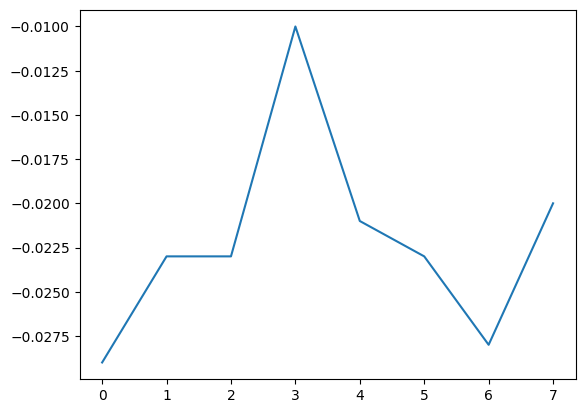

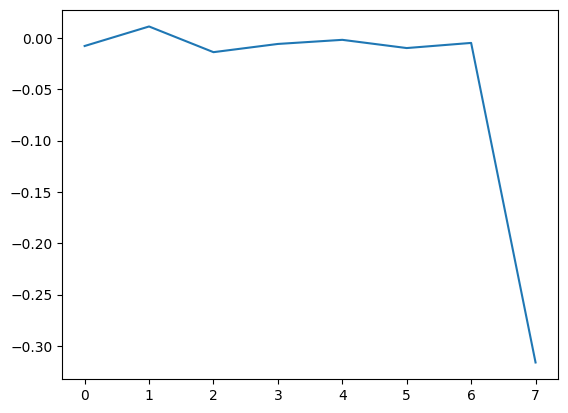

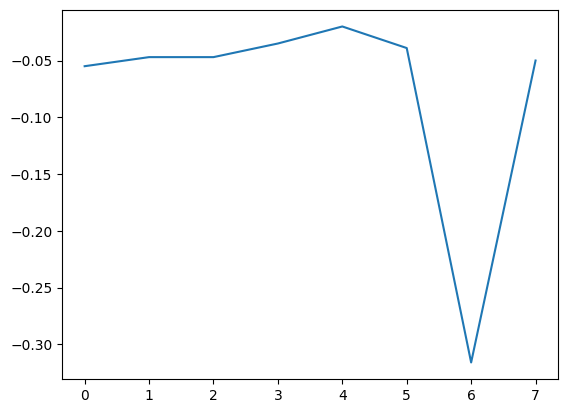

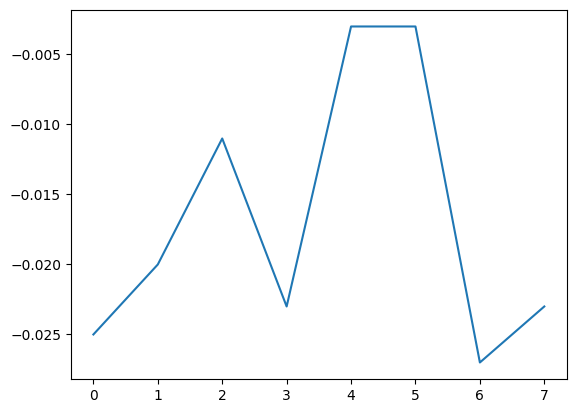

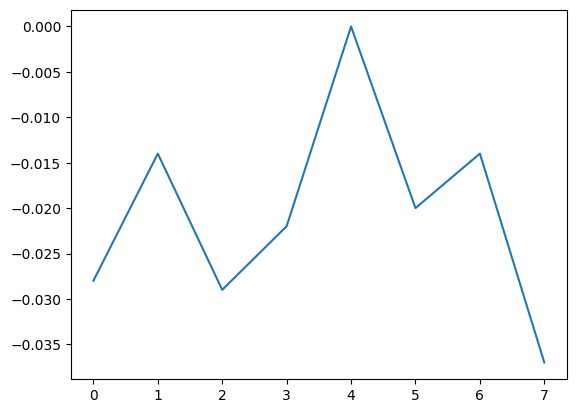

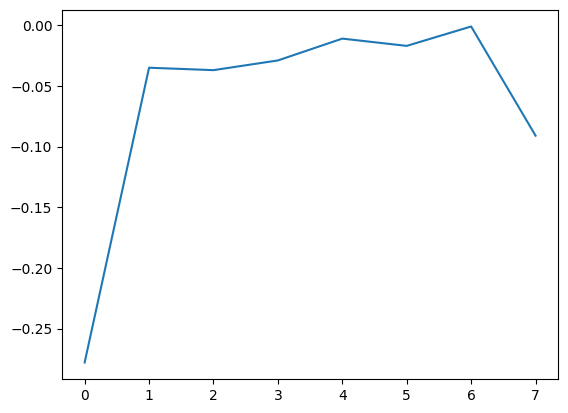

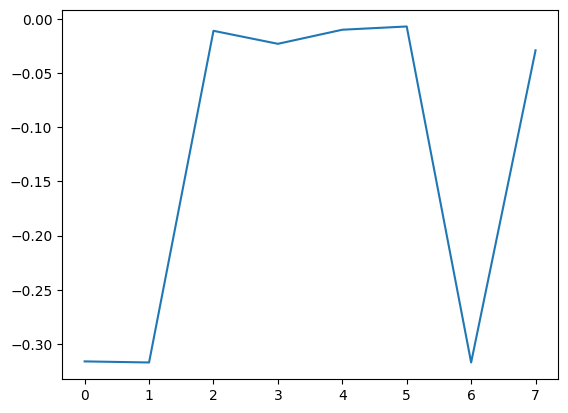

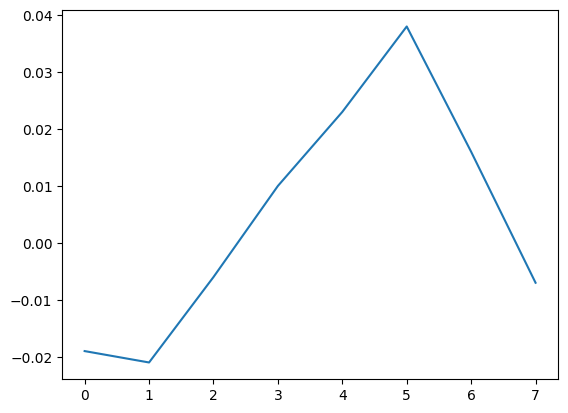

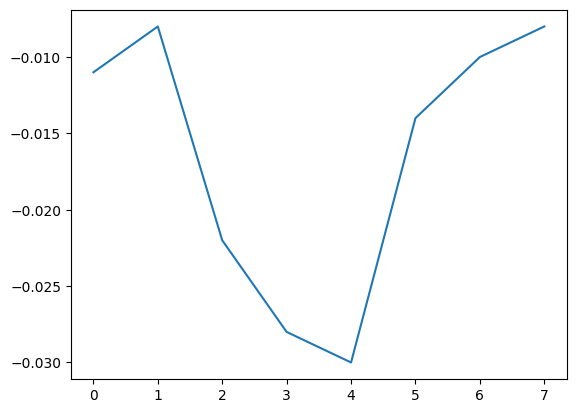

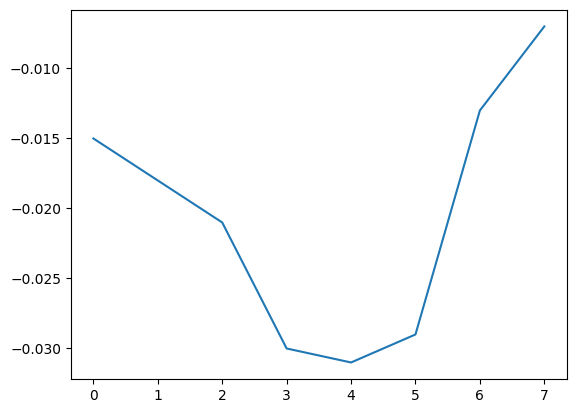

In [6]:
for a in range(len(onset_delay)):
    plt.figure
    plt.plot(onset_delay[a])
    plt.show()

In [7]:
p = np.corrcoef(onset_delay)-1

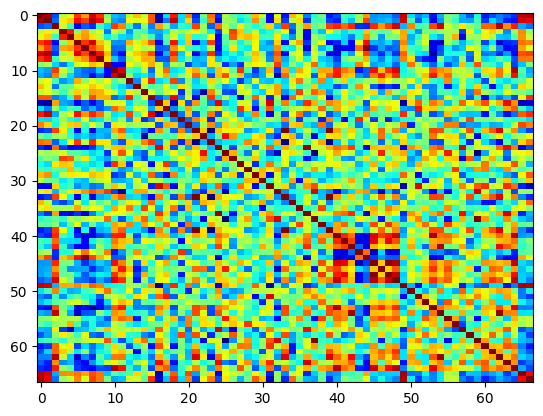

In [63]:
import matplotlib.pyplot as plt

plt.imshow(p, aspect='auto', cmap='jet', origin='upper') 

In [56]:
embedding = MDS(dissimilarity='euclidean', random_state=42)
# embedding = MDS()
p_t = embedding.fit_transform(p)

C:\Users\IBS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [57]:
p_t

array([[ 4.51080237,  1.69890469],
       [ 4.71339811,  1.51827973],
       [-3.7080613 , -0.32047262],
       [ 0.74234699,  2.66948193],
       [ 2.09750657,  2.11870052],
       [ 4.77779449,  0.88210345],
       [ 4.59152729, -0.5013438 ],
       [ 5.09815328,  0.32086267],
       [ 3.81225794, -0.50579498],
       [ 2.71179288, -2.7313318 ],
       [-3.30693173,  0.74852954],
       [-3.45934196,  1.56589584],
       [ 1.55920157,  1.07214033],
       [ 2.82442006, -1.87517671],
       [ 1.71744647, -1.75929344],
       [ 3.79392121,  1.11184083],
       [-2.97515204, -2.97223539],
       [-1.32593462, -1.07065596],
       [ 3.89995612,  2.05183615],
       [ 0.34811595, -3.11796229],
       [ 1.54471652,  2.74375389],
       [-4.00325284, -0.7690275 ],
       [-1.1462516 ,  3.01780966],
       [ 3.86410274,  0.1738641 ],
       [-3.1368606 , -2.4112033 ],
       [-0.86149546,  3.47522635],
       [ 0.32198094,  3.19668403],
       [-1.37111534, -0.59619965],
       [ 0.83023452,

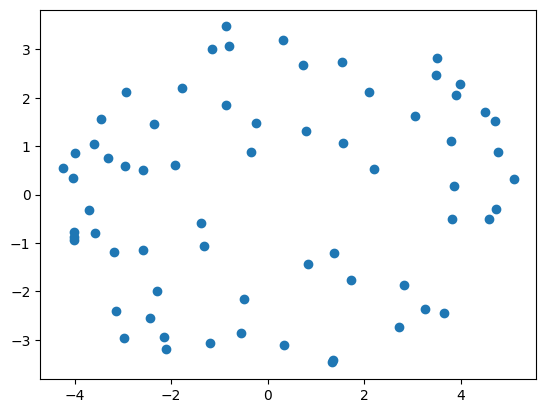

In [58]:
plt.scatter(p_t.T[0], p_t.T[1])

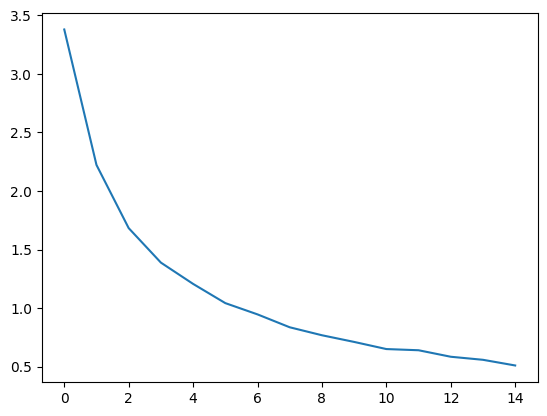

In [59]:
# GMM analysis for categorization

from sklearn import mixture

total_rmse = []
total_g_idx = []
for comp_num in range(15):
    g = mixture.GaussianMixture(n_components = comp_num + 1, covariance_type = 'spherical')
    g.fit(p_t)
    idx = g.predict(p_t)
    
    g_idx = []
    rmse = []
    for a in range(comp_num + 1):
        temp = idx == a
        temp2 = np.where(temp)
        g_idx.append(temp2[0])
    
        # Calculate RMSE
        
        x_data = p_t[temp2[0], [0]]; y_data = p_t[temp2[0], [1]]
        
        Ex = np.mean(x_data); Ey = np.mean(y_data);
        E_xy=[Ex, Ey]
        e_dist = np.sqrt((x_data - E_xy[0]) ** 2 + (y_data - E_xy[1]) ** 2)
        rmse.append(np.mean(e_dist))
        
    rmse_mean = np.mean(rmse)
    total_rmse.append(rmse_mean)
    
    g_idx = np.array(g_idx, dtype = object)
    total_g_idx.append(g_idx)

plt.plot(total_rmse)

In [70]:
idx = total_g_idx[6]

In [71]:
idx

array([array([ 9, 13, 14, 28, 30, 32, 37, 43, 59]),
       array([ 3, 12, 20, 22, 25, 26, 35, 38, 52, 55, 56, 58]),
       array([ 0,  1,  4,  5, 15, 18, 29, 34, 49, 65, 66]),
       array([16, 24, 31, 36, 60, 63]), array([ 6,  7,  8, 23, 44]),
       array([17, 19, 50, 51, 57]),
       array([ 2, 10, 11, 21, 27, 33, 39, 40, 41, 42, 45, 46, 47, 48, 53, 54, 61,
              62, 64])                                                           ],
      dtype=object)

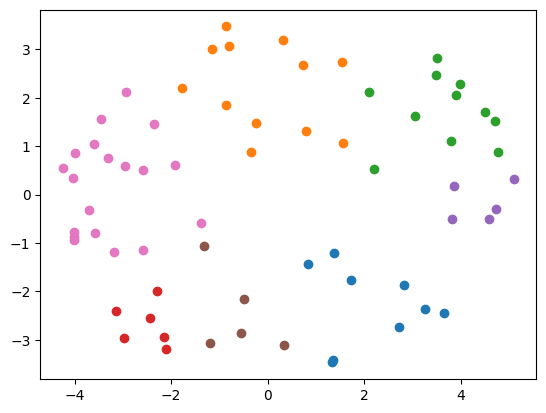

In [72]:
# Plotting

for a in range(len(idx)):
    plt.scatter(p_t[idx[a],[0]], p_t[idx[a],[1]])

In [55]:
# cross correlation

from scipy import signal

lags_total=[]
for a in range(len(onset_delay)):
    f = 1  # frequency
    
    signal1 = onset_delay[a]; ori = len(signal1)
    signal2 = np.sin(f * 2 * np.pi * np.linspace(0, ori, ori))
    
    # Calculate cross-correlation
    cross_correlation = signal.correlate(signal1, signal2)
    lags = signal.correlation_lags(len(signal1), len(signal2))

    m_idx = np.argmax(cross_correlation)
    lags_total.append(lags[m_idx])
    
lags_total = np.array(lags_total)
    
# Sorting cells depending on lag

lags_total_cat = []
c_num = []
for a in lags:
    idx_temp = np.where(lags_total == a)
    lags_total_cat.append(idx_temp[0])

    c_num.append(len(idx_temp[0]))

lags_total_cat = np.array(lags_total_cat, dtype = object)

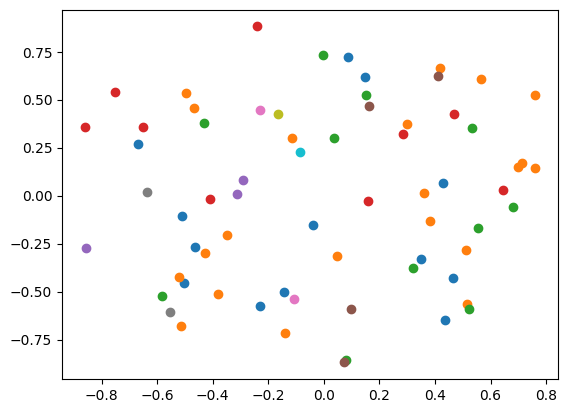

In [120]:
# Plotting

idx = lags_total_cat[np.where(c_num)]

for a in range(len(idx)):
    plt.scatter(p_t[idx[a],[0]], p_t[idx[a],[1]])